Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

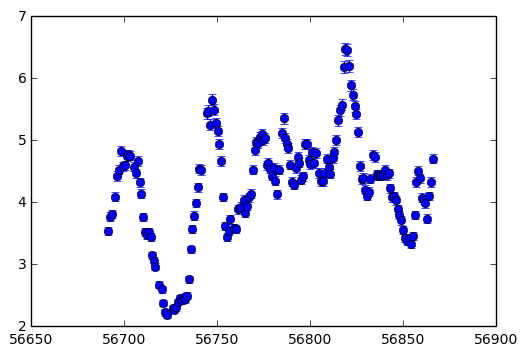

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm
from scipy.optimize import curve_fit
import numpy.fft

ref_file="lc/1367A.lc"
echo_file="lc/5404A.lc"

dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

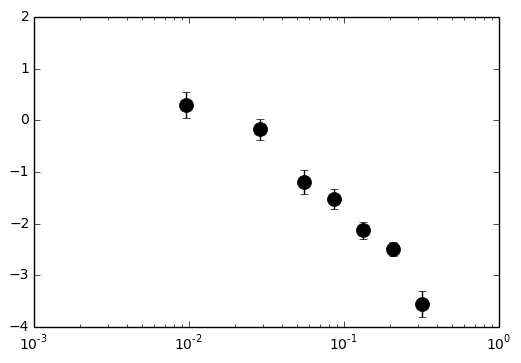

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

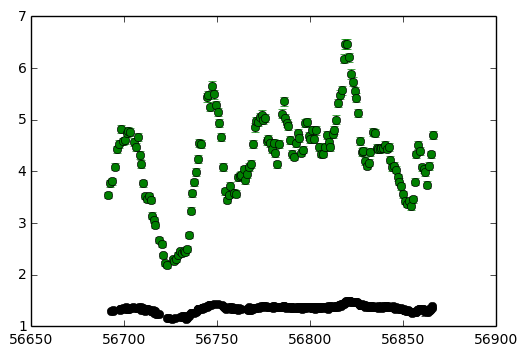

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.610e-01 9.098e+01 inf -- 1.744e+02 -- 1 1 1 1 1 1 1 1
   2 8.066e-01 8.980e+01 1.014e+02 -- 2.758e+02 -- 0.764458 0.592778 0.539049 0.562235 0.572289 0.566582 0.574488 0.570186
   3 4.133e+00 8.890e+01 1.012e+02 -- 3.771e+02 -- 0.390803 0.167503 0.104265 0.129187 0.143015 0.13475 0.14757 0.142553
   4 7.028e+01 8.821e+01 1.004e+02 -- 4.775e+02 -- 0.00503816 -0.253372 -0.326662 -0.304159 -0.285875 -0.29734 -0.280456 -0.284431
   5 8.140e-01 8.698e+01 9.903e+01 -- 5.765e+02 -- -0.34905 -0.657519 -0.755903 -0.73766 -0.713908 -0.729735 -0.710276 -0.71228
   6 3.770e-01 8.522e+01 9.618e+01 -- 6.727e+02 -- -0.633175 -1.02654 -1.18245 -1.1696 -1.13984 -1.16159 -1.14079 -1.13949
   7 2.735e-01 8.339e+01 9.226e+01 -- 7.650e+02 -- -0.806027 -1.33498 -1.60319 -1.59717 -1.56166 -1.59163 -1.57085 -1.56469
   8 2.138e-01 8.120e+01 8.777e+01 -- 8.527e+02 -- -0.862131 -1.54146 -2.00828 -2.01427 -1.9772 -2.01825 -2.00048 -1.98894
   9 1.754e-01 7.801e+01 8.241e+01 -- 9.351e+02 -- -0.842095 -1.59

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 1.185e+03 1.185e+03 -6.752e-01 -4.433e-01 0.84 +++
+++ 1.185e+03 1.184e+03 -6.752e-01 -3.274e-01 1.76 +++
+++ 1.185e+03 1.185e+03 -6.752e-01 -3.854e-01 1.27 +++
+++ 1.185e+03 1.185e+03 -6.752e-01 -4.144e-01 1.04 +++
+++ 1.185e+03 1.185e+03 -6.752e-01 -4.288e-01 0.94 +++
+++ 1.185e+03 1.185e+03 -6.752e-01 -4.216e-01 0.992 +++
	### errors for param 1 ###
+++ 1.185e+03 1.185e+03 -1.483e+00 -1.280e+00 0.943 +++
+++ 1.185e+03 1.184e+03 -1.483e+00 -1.178e+00   2 +++
+++ 1.185e+03 1.185e+03 -1.483e+00 -1.229e+00 1.43 +++
+++ 1.185e+03 1.185e+03 -1.483e+00 -1.254e+00 1.18 +++
+++ 1.185e+03 1.185e+03 -1.483e+00 -1.267e+00 1.06 +++
+++ 1.185e+03 1.185e+03 -1.483e+00 -1.273e+00 0.999 +++
	### errors for param 2 ###
+++ 1.185e+03 1.185e+03 -2.809e+00 -2.563e+00 0.987 +++
+++ 1.185e+03 1.184e+03 -2.809e+00 -2.439e+00 2.1 +++
+++ 1.185e+03 1.185e+03 -2.809e+00 -2.501e+00 1.5 +++
+++ 1.185e+03 1.185e+03 -2.809e+00 -2.532e+00 1.23 +++
+++ 1.185e+03 1.185e+03 -2.809e+00 

<Container object of 3 artists>

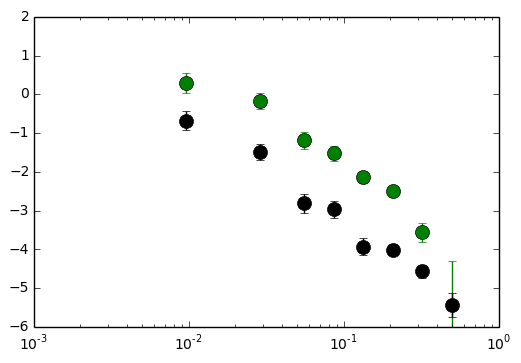

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 3.996e+02 1.150e+01 inf -- 1.244e+03 -- -0.48732 -1.13061 -2.29972 -2.54606 -3.32938 -3.55056 -4.36198 -7.01756 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 1.146e+02 1.274e+01 2.644e+00 -- 1.247e+03 -- -0.46592 -1.09839 -2.27929 -2.51606 -3.2945 -3.53263 -4.40205 -7.31756 0.173375 0.179509 0.201787 0.171316 0.150055 0.152867 0.0990853 -2.1868
   5 6.107e+01 1.422e+01 2.363e+00 -- 1.249e+03 -- -0.445096 -1.06944 -2.25767 -2.48924 -3.26504 -3.51627 -4.44162 -7.01756 0.23367 0.240665 0.283299 0.22705 0.187337 0.196036 0.0982347 -2.11553
   7 2.105e+01 1.585e+01 2.131e+00 -- 1.251e+03 -- -0.425484 -1.04389 -2.23659 -2.46561 -3.24012 -3.50157 -4.48059 -6.71756 0.283283 0.288529 0.348404 0.27129 0.21583 0.231595 0.0974289 -2.46919
   9 2.358e+01 1.743e+01 1.909e+00 -- 1.253e+03 -- -0.40737 -1.02151 -2.21687 -2.44489 -3.21894 -3.48846 -4.51886 -6.41756 0.324291 0.326635 0.400676 0.306939 0.238059 0.261125 0.0966177 -1.38312
  11 4.074e+01 1.911e+01 1.751e+00 -- 1.255e+03 -- -0.390833 -1.00195 -

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 9.0966594 ,  2.8412865 ,  2.00075511,  0.90476609,  0.39301911,
        0.34709626, -0.08532525, -0.24113739])

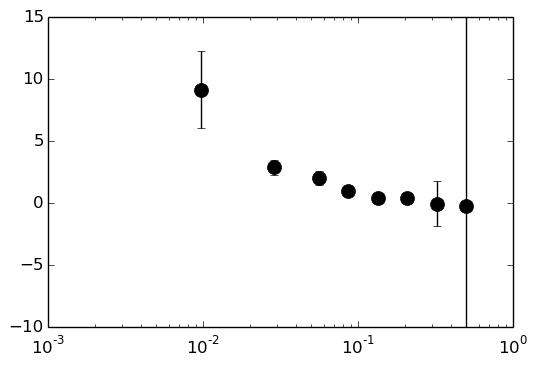

In [18]:


xscale('log'); ylim(-10,15)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

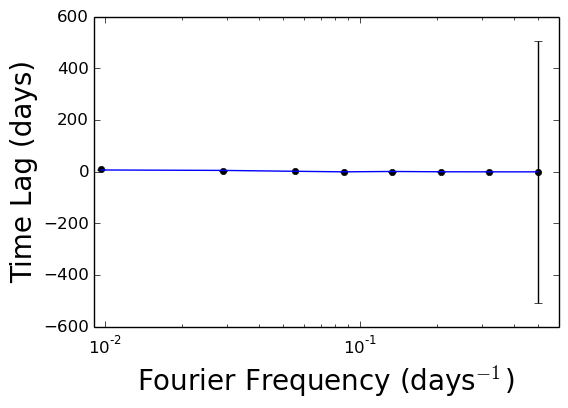

In [19]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)